In [1]:
import os
import json

import matplotlib.pyplot as plt

In [7]:
experiment_results_dir = "./bird_whisperer/experiments/results/"
experiment_results_files = os.listdir(experiment_results_dir)

In [11]:
def plot_experiment_results(results, experiment_name):
  train_metrics = results["train_metrics"]
  test_metrics = results["test_metrics"]

  # Extract metrics
  train_epochs = [metric["epoch"] for metric in train_metrics]
  train_f1_scores = [metric["f1-score"] for metric in train_metrics]
  train_precisions = [metric["precision"] for metric in train_metrics]
  train_recalls = [metric["recall"] for metric in train_metrics]
  train_accuracies = [metric["accuracy"] for metric in train_metrics]
  train_losses = [metric["avg_loss"] for metric in train_metrics]

  test_epochs = [metric["epoch"] for metric in test_metrics]
  test_f1_scores = [metric["f1-score"] for metric in test_metrics]
  test_precisions = [metric["precision"] for metric in test_metrics]
  test_recalls = [metric["recall"] for metric in test_metrics]
  test_accuracies = [metric["accuracy"] for metric in test_metrics]
  test_losses = [metric["avg_loss"] for metric in test_metrics]

  # Create subplots
  fig, axs = plt.subplots(3, 2, figsize=(12, 10))

  # Train and Test Loss
  axs[0, 0].plot(train_epochs, train_losses, marker='o', label='Train Loss', color='blue')
  axs[0, 0].plot(test_epochs, test_losses, marker='x', label='Test Loss', color='orange')
  axs[0, 0].set_title('Loss')
  axs[0, 0].set_xlabel('Epoch')
  axs[0, 0].set_ylabel('Loss')
  axs[0, 0].set_ylim(0)  # Y-axis starts at 0
  axs[0, 0].set_xticks(range(min(train_epochs), max(train_epochs) + 1))  # Whole number ticks
  axs[0, 0].legend()

  # F1-score
  axs[0, 1].plot(train_epochs, train_f1_scores, marker='o', label='Train F1', color='blue')
  axs[0, 1].plot(test_epochs, test_f1_scores, marker='x', label='Test F1', color='orange')
  axs[0, 1].set_title('F1 Score')
  axs[0, 1].set_xlabel('Epoch')
  axs[0, 1].set_ylabel('F1 Score')
  axs[0, 1].set_ylim(0)  # Y-axis starts at 0
  axs[0, 1].set_xticks(range(min(train_epochs), max(train_epochs) + 1))  # Whole number ticks
  axs[0, 1].legend()

  # Precision
  axs[1, 0].plot(train_epochs, train_precisions, marker='o', label='Train Precision', color='blue')
  axs[1, 0].plot(test_epochs, test_precisions, marker='x', label='Test Precision', color='orange')
  axs[1, 0].set_title('Precision')
  axs[1, 0].set_xlabel('Epoch')
  axs[1, 0].set_ylabel('Precision')
  axs[1, 0].set_ylim(0)  # Y-axis starts at 0
  axs[1, 0].set_xticks(range(min(train_epochs), max(train_epochs) + 1))  # Whole number ticks
  axs[1, 0].legend()

  # Recall
  axs[1, 1].plot(train_epochs, train_recalls, marker='o', label='Train Recall', color='blue')
  axs[1, 1].plot(test_epochs, test_recalls, marker='x', label='Test Recall', color='orange')
  axs[1, 1].set_title('Recall')
  axs[1, 1].set_xlabel('Epoch')
  axs[1, 1].set_ylabel('Recall')
  axs[1, 1].set_ylim(0)  # Y-axis starts at 0
  axs[1, 1].set_xticks(range(min(train_epochs), max(train_epochs) + 1))  # Whole number ticks
  axs[1, 1].legend()

  # Accuracy
  axs[2, 0].plot(train_epochs, train_accuracies, marker='o', label='Train Accuracy', color='blue')
  axs[2, 0].plot(test_epochs, test_accuracies, marker='x', label='Test Accuracy', color='orange')
  axs[2, 0].set_title('Accuracy')
  axs[2, 0].set_xlabel('Epoch')
  axs[2, 0].set_ylabel('Accuracy')
  axs[2, 0].set_ylim(0)  # Y-axis starts at 0
  axs[2, 0].set_xticks(range(min(train_epochs), max(train_epochs) + 1))  # Whole number ticks
  axs[2, 0].legend()

  fig.suptitle(f"{experiment_name} Results")
  fig.tight_layout()

  return fig

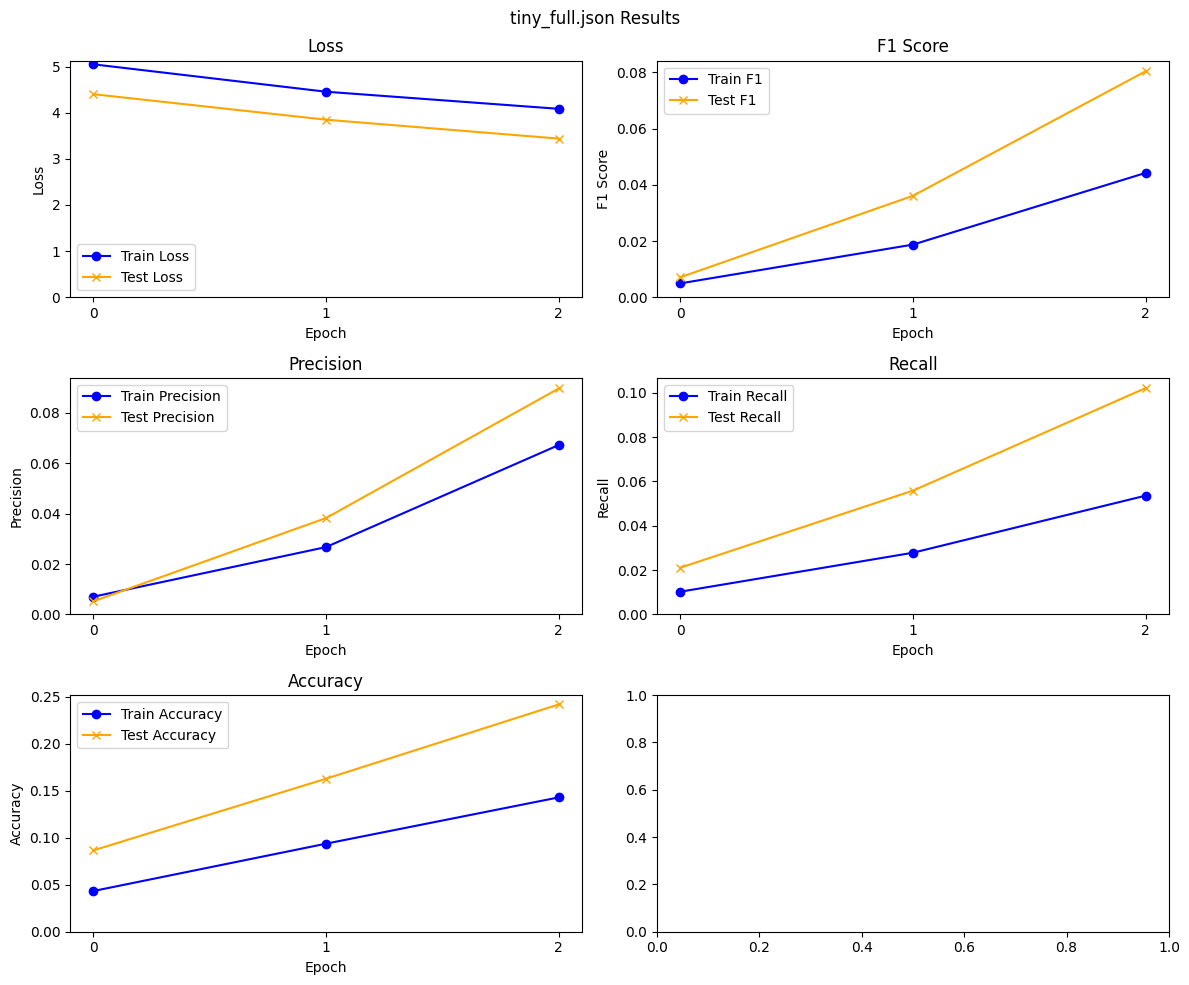

In [12]:
for experiment_results_file in experiment_results_files:
  with open(experiment_results_dir + experiment_results_file, "r") as f:
    results = json.load(f)
    plot = plot_experiment_results(results, experiment_results_file)
    plot